Based on the comment on last homework, "I think you misunderstood the assignment. A big chunk of the assignment was to write functions that you will be able to use for processing new datasets going forward. Yes, there was also
a component for doing the same kind of data exploration you did for assigment 1 and for fitting a classifier to the data + evaluating it so I can give you some points." I put the works in helper functions this time

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/credit-data.csv")

In [3]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'] * 100
df['DebtRatio'] = df['DebtRatio'] * 100
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,99.999990,55,60601,0,50500.000000,0.0,2,0,0,0,0.0
1,98991,0,54.774523,71,60601,0,45.956469,15666.0,7,0,2,0,0.0
2,99012,0,4.428021,51,60601,0,1.452035,4200.0,5,0,0,0,0.0
3,99023,0,91.424929,55,60601,4,79.487463,9052.0,12,0,3,0,0.0
4,99027,0,2.659867,45,60601,0,4.996637,10406.0,4,0,0,0,2.0


In [4]:
import explore_data
%matplotlib inline

In [5]:
dep_var = 'SeriousDlqin2yrs'
explore_data.dep_var = 'SeriousDlqin2yrs'
explore_data.lead_var = 2

In [6]:
dic = explore_data.explore(df)
summary = dic['summary']
features = dic['features']

In [7]:
summary

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,4.101600e+04,41016.000000,41016.000000,41016.000000,4.101600e+04,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.375870e+02,51.683489,60623.824166,0.589233,3.314581e+04,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,2.216189e+04,14.746880,11.984357,5.205628,1.296110e+05,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.000000e+00,21.000000,60601.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,3.431010e+00,41.000000,60618.000000,0.000000,1.763753e+01,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,1.897303e+01,51.000000,60625.000000,0.000000,3.697357e+01,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,6.671597e+01,62.000000,60629.000000,0.000000,8.664706e+01,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,2.200000e+06,109.000000,60644.000000,98.000000,1.068850e+07,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [8]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

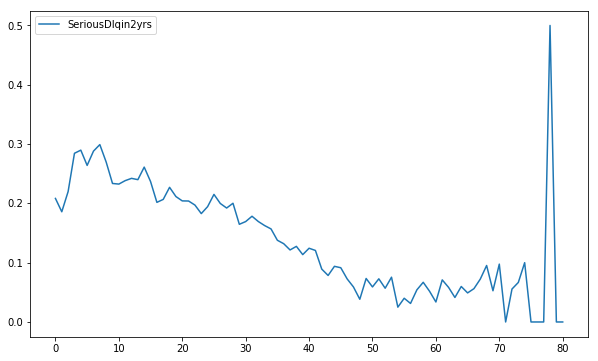

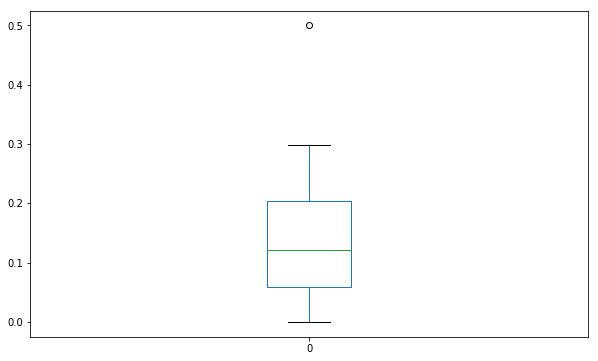

In [9]:
# plotting age
explore_data.explore_var(df, 'age', 'line')['plot']
explore_data.explore_var(df, 'age', 'box')['plot']

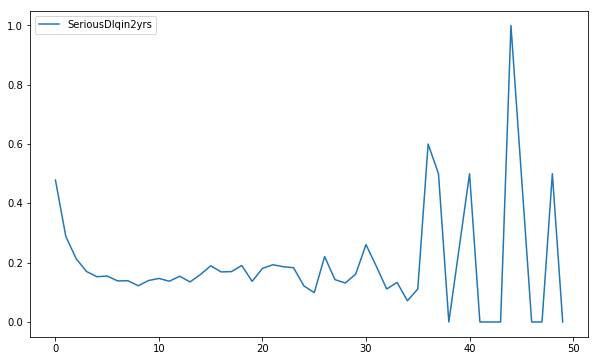

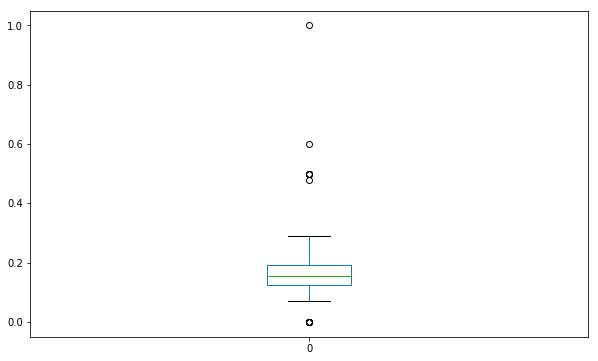

In [10]:
# plotting credit and loans
explore_data.explore_var(df,'NumberOfOpenCreditLinesAndLoans','line')["plot"]
explore_data.explore_var(df,'NumberOfOpenCreditLinesAndLoans','box')["plot"]

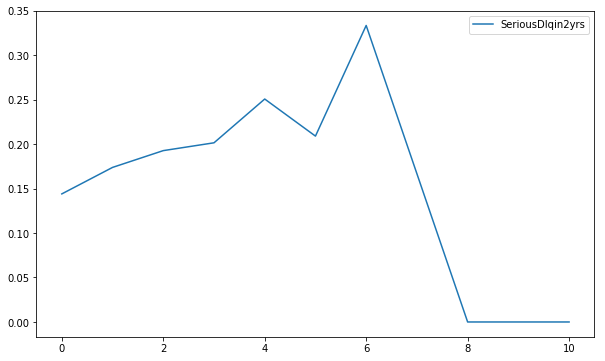

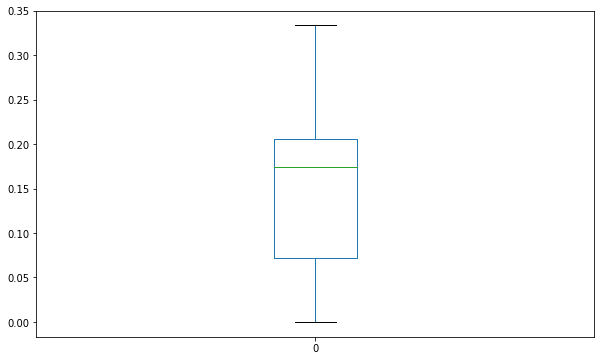

In [11]:
# plotting number of dependents
explore_data.explore_var(df,'NumberOfDependents','line')["plot"]
explore_data.explore_var(df,'NumberOfDependents','box')["plot"]

In [12]:
import clean_data

In [13]:
clean_data.nans(df)

value,False,True
variable,,
DebtRatio,41016,0
MonthlyIncome,33042,7974
NumberOfDependents,39979,1037
NumberOfOpenCreditLinesAndLoans,41016,0
NumberOfTime30-59DaysPastDueNotWorse,41016,0
NumberOfTime60-89DaysPastDueNotWorse,41016,0
NumberOfTimes90DaysLate,41016,0
NumberRealEstateLoansOrLines,41016,0
PersonID,41016,0


In [14]:
df = clean_data.fill(df, 'NumberOfDependents', 'zero')
df = clean_data.fill(df, 'MonthlyIncome', 'mean')
clean_data.nans(df)

value,False
variable,
DebtRatio,41016
MonthlyIncome,41016
NumberOfDependents,41016
NumberOfOpenCreditLinesAndLoans,41016
NumberOfTime30-59DaysPastDueNotWorse,41016
NumberOfTime60-89DaysPastDueNotWorse,41016
NumberOfTimes90DaysLate,41016
NumberRealEstateLoansOrLines,41016
PersonID,41016


In [15]:
import features_gen

In [16]:
features_gen.make_bins(df, 'MonthlyIncome', 'quantiles', [0, 0.25, 0.5, 0.75, 1])
features.append(df.keys()[-1])

In [17]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'bins_MonthlyIncome']

In [18]:
features_selected = ['RevolvingUtilizationOfUnsecuredLines',
                     'NumberOfTime30-59DaysPastDueNotWorse',
                     'DebtRatio',
                     'NumberOfOpenCreditLinesAndLoans',
                     'NumberOfTimes90DaysLate',
                     'NumberRealEstateLoansOrLines',
                     'NumberOfTime60-89DaysPastDueNotWorse',
                     'NumberOfDependents']

In [19]:
import classifier_gen

/home/bac2qh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/bac2qh/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
grid_size  = 'small'
classifiers, grid = classifier_gen.clfs_params(grid_size)
models=['BAG','RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
metrics = ['precision', 'recall', 'f1', 'auc']

In [21]:
all_models = classifier_gen.classify(df[features_selected], df[dep_var], models, 3, 0.05, metrics,classifiers, grid)

BAG
0.3975942134857178
0.4059901237487793
0.41268134117126465
0.5142602920532227
0.5060534477233887
0.4069201946258545
0.410353422164917
0.4110991954803467
0.40872931480407715
0.5089354515075684
0.5062854290008545
0.5101652145385742
0.40517377853393555
0.4000661373138428
0.41298842430114746
0.505051851272583
0.5135359764099121
0.5198137760162354
0.42900657653808594
0.4117562770843506
0.40498900413513184
0.5005533695220947
0.5047686100006104
0.5060019493103027
Finished running BAG
RF
0.21878337860107422
0.21966099739074707
0.21617507934570312
0.5727188587188721
0.47795915603637695
0.47634077072143555
0.2162022590637207
0.2194831371307373
0.2198505401611328
0.4749720096588135
0.47316503524780273
0.4712216854095459
0.21644139289855957
0.22183632850646973
0.22021055221557617
0.5733692646026611
0.5704805850982666
0.6826076507568359
0.215986967086792
0.21690845489501953
0.21677279472351074
0.5958442687988281
0.571223258972168
0.6736056804656982
0.21679925918579102
0.3169748783111572
0.215115

0.21650981903076172
0.2137458324432373
0.3711729049682617
0.3699660301208496
0.36510348320007324
0.21860790252685547
0.21810555458068848
0.21689629554748535
0.36827635765075684
0.3691575527191162
0.37013840675354004
0.218796968460083
0.21801447868347168
0.21771550178527832
0.6657617092132568
0.6711513996124268
0.6719858646392822
0.22246813774108887
0.21638751029968262
0.21785926818847656
0.5656492710113525
0.56777024269104
0.5689475536346436
0.21635675430297852
0.21757221221923828
0.21544480323791504
0.7758212089538574
0.6770849227905273
0.6841590404510498
0.22351861000061035
0.21677160263061523
0.2202746868133545
0.6691205501556396
0.6770579814910889
0.6855819225311279
0.22394585609436035
0.21923065185546875
0.21770286560058594
0.36955881118774414
0.374849796295166
0.37371110916137695
0.21733379364013672
0.21686339378356934
0.21857309341430664
0.3733234405517578
0.3701794147491455
0.3727715015411377
0.2188103199005127
0.21526432037353516
0.21834111213684082
0.3708682060241699
0.365131

In [22]:
df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'bins_MonthlyIncome'],
      dtype='object')

In [23]:
dat_metric = "auc"
best_models_auc = classifier_gen.find_best_model_for_metric(dat_metric, all_models)

This is the result for auc
BAG
{'max_features': 5, 'max_samples': 100, 'n_estimators': 10}
0.6433326289075457
RF
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
0.7274348971016202
DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10}
0.742263800432187
KNN
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.668448825934869
ET
{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.729172303497009
AB
{'algorithm': 'SAMME', 'n_estimators': 1}
0.5
GB
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
0.7410330869362055
LR
{'C': 0.1, 'penalty': 'l2'}
0.5057961331011577
NB
{}
0.511065086094692
And the award for overal winner goes to ... DT under {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10} at 0.742263800432187




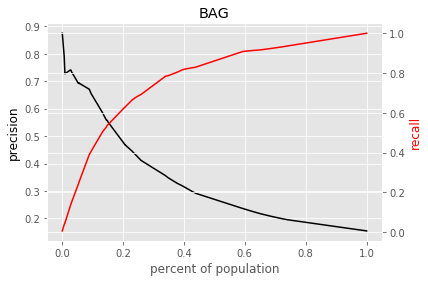

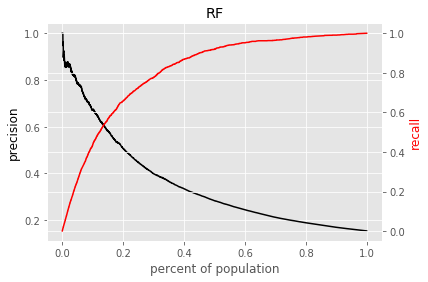

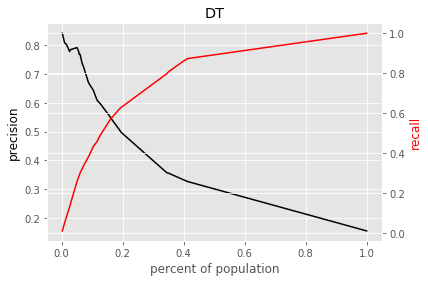

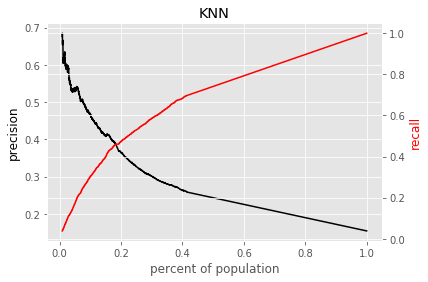

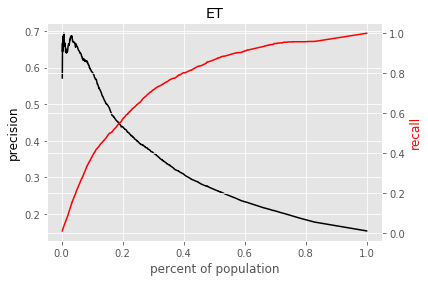

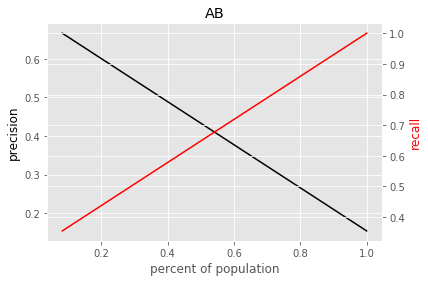

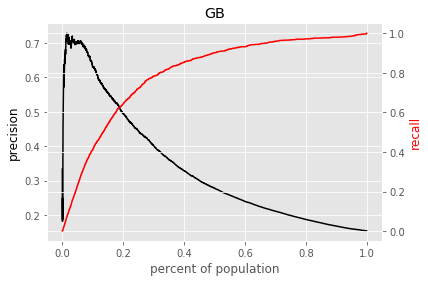

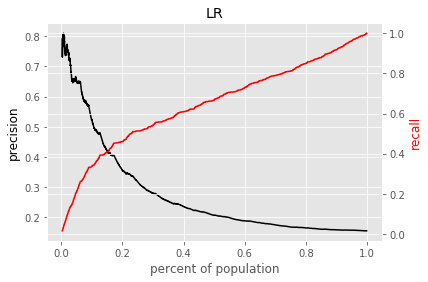

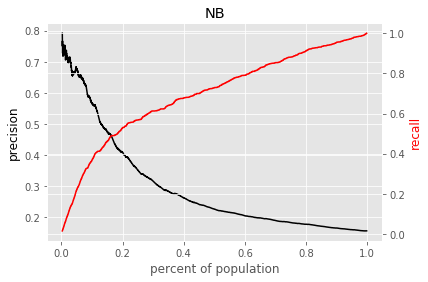

In [24]:
classifier_gen.plots(df[features_selected], df[dep_var], best_models_auc, classifiers)

no metrics for parameters

In [25]:
models

['BAG', 'RF', 'DT', 'KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

In [26]:
for dat_metric in ['auc', 'f1', 'precision', 'recall']:
    classifier_gen.find_best_model_for_metric(dat_metric, all_models)

This is the result for auc
BAG
{'max_features': 5, 'max_samples': 100, 'n_estimators': 10}
0.6433326289075457
RF
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
0.7274348971016202
DT
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10}
0.742263800432187
KNN
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.668448825934869
ET
{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.729172303497009
AB
{'algorithm': 'SAMME', 'n_estimators': 1}
0.5
GB
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
0.7410330869362055
LR
{'C': 0.1, 'penalty': 'l2'}
0.5057961331011577
NB
{}
0.511065086094692
And the award for overal winner goes to ... DT under {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10} at 0.742263800432187


This is the result for f1
BAG
{'max_features': 5, 'max_samples': 100

In [27]:
classifier_gen.find_best_model_for_time(all_models)

This is the result for time
BAG
{'max_features': 1, 'max_samples': 10, 'n_estimators': 10}
0.4054218928019206
RF
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}
0.21655607223510742
DT
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 5}
0.007062117258707683
KNN
{'algorithm': 'kd_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.08335288365681966
ET
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}
0.215744415918986
AB
{'algorithm': 'SAMME', 'n_estimators': 1}
0.016203006108601887
GB
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.1}
0.17623162269592285
LR
{'C': 1e-05, 'penalty': 'l1'}
0.02631990114847819
NB
{}
0.009703874588012695
And the award for overal winner goes to ... DT under {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10} at 0.007062117258707683




In [28]:
import importlib
importlib.reload(classifier_gen)

<module 'classifier_gen' from '/home/bac2qh/Dropbox/Machine_Learning/Assignment_3/classifier_gen.py'>

In [31]:
import json
 
json = json.dumps(all_models)
f = open("all_models.json","w")
f.write(json)
f.close()

# with open('all_models.json') as json_data:
#     all_models_2 = json.load(json_data)

In [30]:
all_models = all_models_2